In [17]:
import os
import pandas as pd
import numpy as np
import openmatrix as omx

In [18]:
def od_matrix_lookup(origin, destination, matrix):
    ''' Returns the distance between origin and estiantion in miles
    Parameters:
    -----------
    - origing: 1-d array-like. origins ID 
    - destination: 1- d array_like. destination ID 
    - matrix: 2-d array-like. Origin-destiantion matrix for a given metric. 
                              Rows are origins, columns are destinations 
                              
    Returns: 
    1-d array of the origin-destination metric. 
    '''
    assert origin.ndim == 1, 'origin should be a 1-d array'
    assert destination.ndim == 1, 'destination should be 1-d array'
    assert matrix.ndim == 2, 'distance matrix should be 2-d array'
    assert origin.shape == destination.shape, 'origin and destination should have the same shape'
    
    #Transform array-like to numpy array in case they are not
    #Substract 1 because distance matrix starts in ZERO
    origin = np.array(origin) - 1
    destination = np.array(destination) - 1
    return matrix[origin, destination]

In [19]:
trips = pd.read_csv('output/final_trips.csv')
skims = omx.open_file(os.path.join('data', 'skims.omx'),'r')

In [20]:
distances = np.array(skims['DIST'])

In [23]:
trips['distance'] = od_matrix_lookup(trips['origin'], trips['destination'], distances)

In [24]:
school_trips = trips[trips.primary_purpose.isin(['school', 'univ'])]

In [26]:
st = school_trips[school_trips.purpose.isin(['school', 'univ'])]

<AxesSubplot:ylabel='Frequency'>

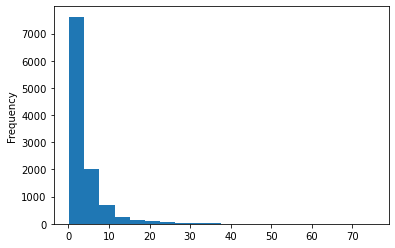

In [29]:
st.distance.plot.hist(bins = 20)

In [34]:
st['less_10'] = st.distance<10

<ipython-input-34-e93782a34a40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['less_10'] = st.distance<10


In [38]:
st['less_10'].sum()/len(st)

0.9263157894736842

<AxesSubplot:ylabel='Frequency'>

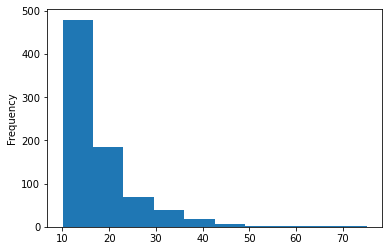

In [47]:
st[~st.less_10].distance.plot.hist()

In [48]:
import seaborn as sns

<AxesSubplot:xlabel='distance', ylabel='Count'>

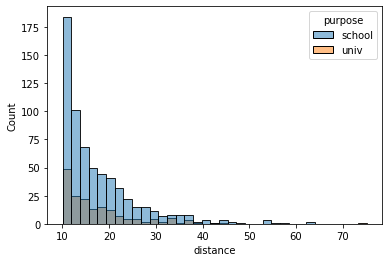

In [50]:
sns.histplot(x = 'distance', hue = 'purpose', data = st[~st.less_10])

In [32]:
st.sort_values(by = 'distance').tail(50)

,trip_id,person_id,household_id,tour_id,primary_purpose,trip_num,outbound,trip_count,purpose,destination,origin,destination_logsum,depart,trip_mode,mode_choice_logsum,distance
78393,1304039689,3975730,1566090,163004961,school,1,True,1,school,817,294,NaN,7.0,SHARED3FREE,-3.691185,33.00
75134,574972113,1752963,673305,71871514,univ,1,True,1,univ,12,1171,NaN,13.0,DRIVE_HVY,-2.874795,33.39
9048,906394793,2763398,1053546,113299349,school,1,True,1,school,1323,1313,NaN,7.0,SHARED3FREE,-5.304970,33.41
149529,995042041,3033664,1175245,124380255,school,1,True,1,school,366,17,NaN,8.0,SHARED2FREE,-5.522339,33.59
175821,2088524833,6367453,2427897,261065604,school,1,True,1,school,1307,1382,NaN,7.0,SHARED2FREE,-4.009067,33.80
36994,785919081,2396094,899774,98239885,school,1,True,1,school,1280,1095,NaN,8.0,SHARED2FREE,-6.169220,33.83
87630,409942849,1249825,479294,51242856,univ,1,True,1,univ,108,732,NaN,9.0,DRIVEALONEFREE,-2.551635,33.97
32250,1187245121,3619649,1440427,148405640,school,1,True,1,school,1083,232,NaN,9.0,WALK_HVY,-5.361533,34.26
96065,895866321,2731299,1040631,111983290,school,1,True,1,school,1188,1292,NaN,7.0,SHARED3FREE,-4.143333,34.58
77526,448852505,1368452,521909,56106563,school,1,True,1,school,335,720,NaN,7.0,SHARED3FREE,-6.350643,34.84
